In [1]:
import copy
import pandas as pd

df = pd.read_csv('resources/train.csv', index_col='Id')
df_test = pd.read_csv('resources/test.csv', index_col='Id')

# Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [3]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

There are 81 columns in the dataset and the dataset contains 1460 rows. The label is SalePrice.

There's no doublon in the dataset but a lot of NA values.

The columns with many missing values are: PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu.
Some NA values mean "Not present" such as NA PoolQC means "No Pool". So it should be considered as an information instead of a lack of information.

In [4]:
df.isna().sum().nlargest(81)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [5]:
#Drop des colonnes qui ont des données manquantes
na_columns = df.isna().sum()
na_columns = na_columns[na_columns>0]
df.drop(na_columns.index, axis=1, inplace=True)

In [6]:
print('Colonnes enlevées du dataframe : ', na_columns.index.tolist())

Colonnes enlevées du dataframe :  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
df_test.drop(na_columns.index, axis=1, inplace=True)

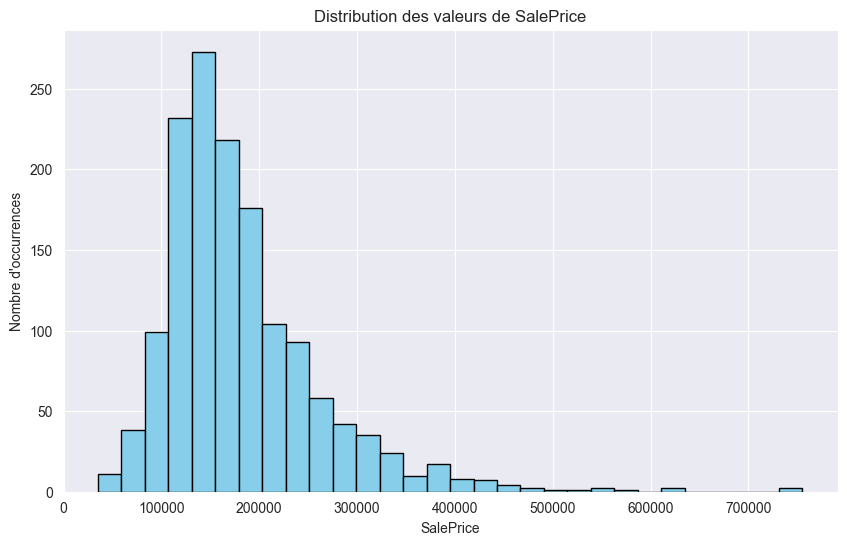

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('SalePrice')
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des valeurs de SalePrice')
plt.grid(True)
plt.show()

On peut voir que la majorité des biens sont situés entre 50.000 et 400.000€

In [9]:
#Remplacement des données NA
def fillnavalues(df):
    df_num = df.select_dtypes(include=['float64', 'int64'])
    for colonne in df_num.columns:
        df[colonne] = df[colonne].fillna(df[colonne].mean())

    # Filling missing String object values
    df_obj = df.select_dtypes(include=['object'])
    for colonne in df_obj.columns:
        df[colonne] = df[colonne].fillna('NONE')

fillnavalues(df)
fillnavalues(df_test)

def factorizevalues(df):
    df_obj = df.select_dtypes(include=['object'])
    for colonne in df_obj.columns:
        df[colonne]=pd.factorize(df[colonne])[0]
    return df

df_to_corr = copy.deepcopy(df)
df_corr = factorizevalues(df_to_corr)

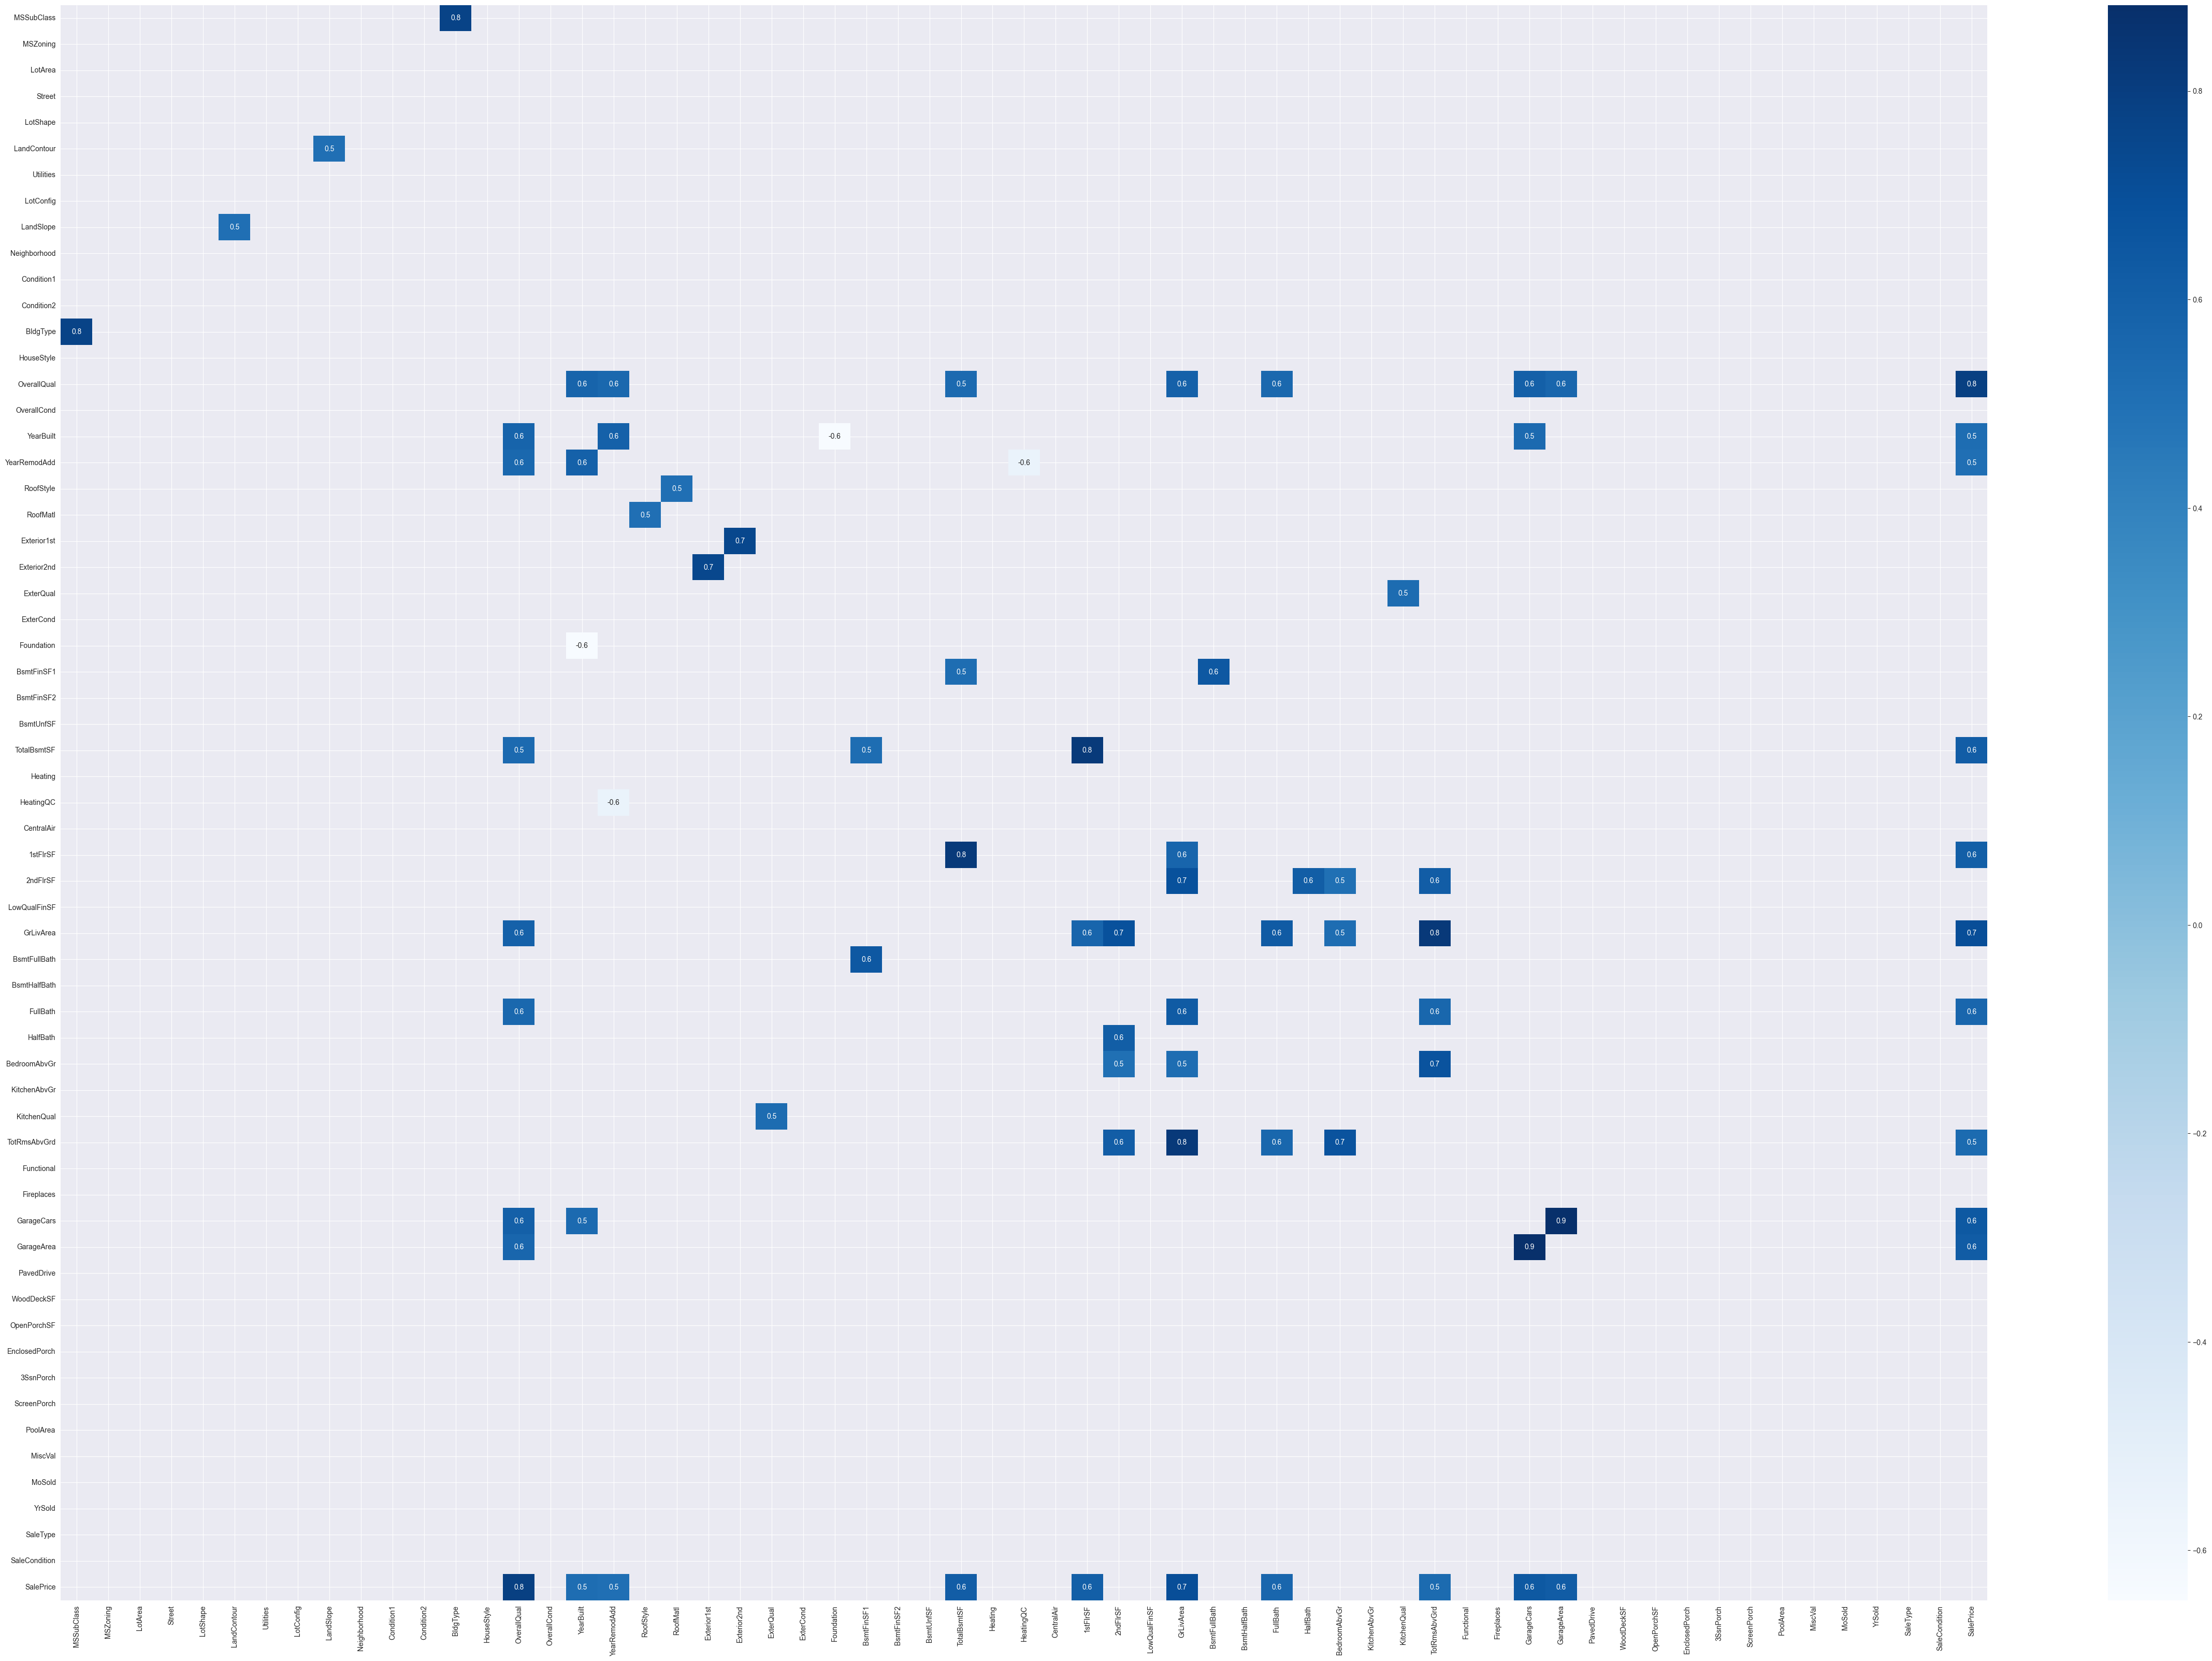

In [10]:
cor=df_corr.corr()
#N'afficher que les corrélations fortes
hot_cor = cor[(cor.abs() >= 0.5) & (cor != 1.0)]
plt.figure(figsize=(60,40))
sns.heatmap(data=hot_cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

In [11]:
# Calculer la corrélation entre 'SalePrice' et les autres colonnes
correlation_with_sale_price = cor['SalePrice']

# Sélectionner les colonnes en X avec un coefficient de corrélation supérieur à 0.1 avec 'SalePrice'
relevant_columns = correlation_with_sale_price[(correlation_with_sale_price.abs() > 0.5)].index.tolist()

# Afficher les colonnes en X avec un coefficient de corrélation supérieur à 0.5 avec 'SalePrice'
print("Colonnes en X avec un coefficient de corrélation supérieur à 0.5 en incluant SalePrice:")
print(relevant_columns)

Colonnes en X avec un coefficient de corrélation supérieur à 0.5 en incluant SalePrice:
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


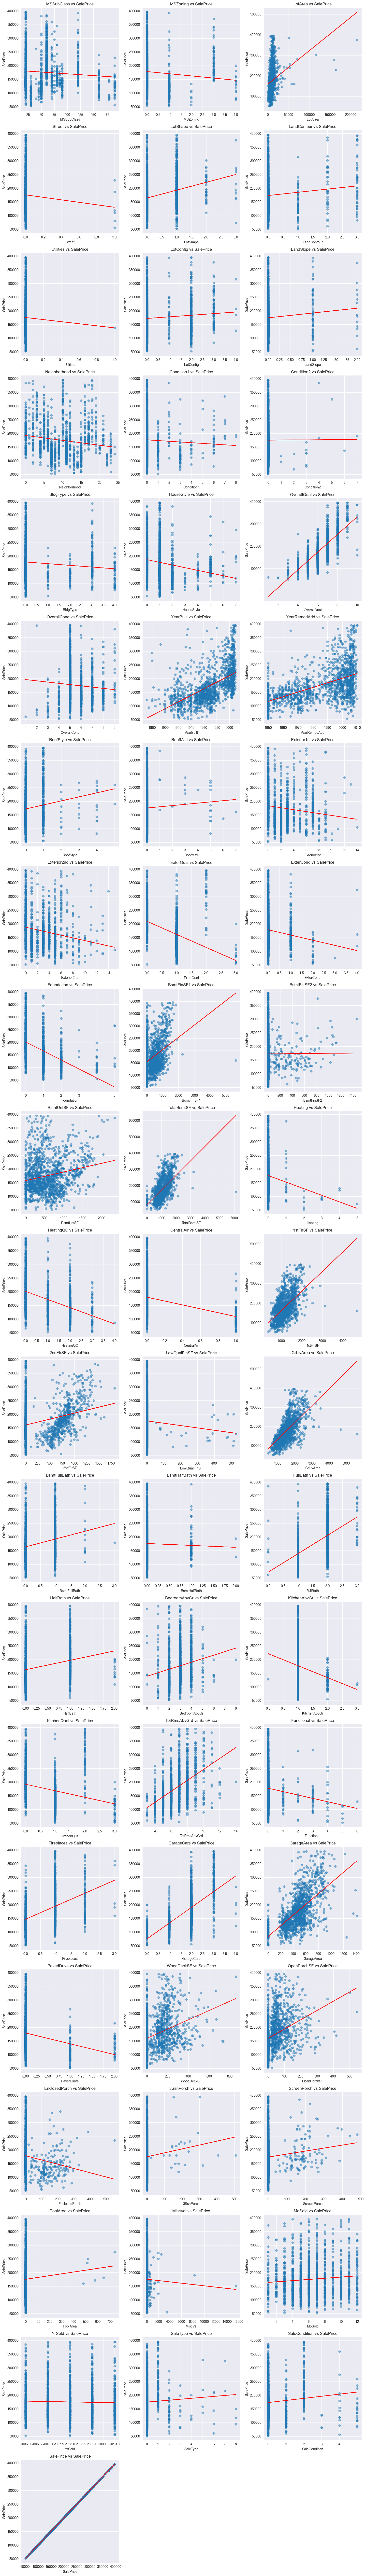

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrer uniquement les colonnes numériques
df_corr = df_corr[(df_corr['SalePrice'] >= 50000) & (df_corr['SalePrice'] <= 400000)]
numeric_columns = df_corr.select_dtypes(include=['int64', 'float64']).columns

# Spécifiez le nombre de colonnes par ligne dans le tracé
columns_per_row = 3

# Calculez le nombre total de colonnes
total_columns = len(numeric_columns)

# Calculez le nombre total de lignes dans le tracé
total_rows = (total_columns + columns_per_row - 1) // columns_per_row

# Créez une figure et des sous-tracés
fig, axs = plt.subplots(total_rows, columns_per_row, figsize=(15, total_rows * 5))

# Aplatir les sous-tracés pour faciliter l'indexation
axs = axs.flatten()

# Parcours de toutes les colonnes numériques, à l'exception de 'SalePrice'
for i, column in enumerate(numeric_columns):
    # Tracer le nuage de points pour la colonne actuelle
    axs[i].scatter(df_corr[column], df_corr['SalePrice'], alpha=0.5)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_title(f'{column} vs SalePrice')

    # Ajuster une régression linéaire
    slope, intercept = np.polyfit(df_corr[column], df_corr['SalePrice'], 1)

    # Tracer la droite de tendance
    axs[i].plot(df_corr[column], slope * df_corr[column] + intercept, color='red')

# Masquer les sous-tracés supplémentaires s'il y en a
for j in range(total_columns, total_rows * columns_per_row):
    axs[j].axis('off')

# Ajuster automatiquement la disposition des sous-tracés pour éviter les superpositions
plt.tight_layout()

# Afficher le graphique
plt.show()

# Data Preprocessing and encoding

In [13]:
#Drop des données aberrantes qui pourraient fausser ou induire le modèle en erreur
df = df[(df['SalePrice'] >= 50000) & (df['SalePrice'] <= 400000)]

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting features
selected_features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea',
                     'FullBath', 'TotRmsAbvGrd',  'GarageCars', 'GarageArea', 'Fireplaces',
                     'LotShape', 'RoofStyle', 'RoofMatl', 'SaleCondition',
                     'BsmtFinSF1', 'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood',
                     'LotArea', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'KitchenQual',
                     'SalePrice']
selected_features_test = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea',
                     'FullBath', 'TotRmsAbvGrd',  'GarageCars', 'GarageArea', 'Fireplaces',
                     'LotShape', 'RoofStyle', 'RoofMatl', 'SaleCondition',
                     'BsmtFinSF1', 'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood',
                     'LotArea', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'KitchenQual']
#Subsetting dataframe
df = df[selected_features]
df_test = df_test[selected_features_test]

In [15]:
# Separating target variable
X = df.drop(columns='SalePrice')
y = df['SalePrice']

# One-hot encoding categorical features
one_hot_encoder = OneHotEncoder()

#Concaténation des deux fichier pour obtenir toutes les features
super_df = pd.concat([X, df_test])
one_hot_encoder.fit(super_df.select_dtypes(include=['object', 'int64', 'float64']));
X_encoded = one_hot_encoder.transform(X.select_dtypes(include=['object', 'int64', 'float64']))

# Scaling numerical features
scaler = StandardScaler()
scaler.fit(super_df.select_dtypes(exclude=['object']));
X_scaled = scaler.transform(X.select_dtypes(exclude=['object']))

# Concatenating encoded categorical features and scaled numerical features
X_preprocessed = pd.concat([pd.DataFrame(X_encoded.toarray()), pd.DataFrame(X_scaled)], axis=1)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, random_state=42)

# Training the model

In [16]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Initialize the model -> Lasso is the most effective
model_lasso = Lasso(max_iter=40000)
model_rfg = RandomForestRegressor(random_state=42)

# Train the model
model_lasso.fit(X_train, y_train)
model_rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Retrieve the model's predictions
y_pred_lasso = model_lasso.predict(X_test)
y_pred_rfg = model_rfg.predict(X_test)

y_pred = (y_pred_lasso + y_pred_rfg) / 2
#Ajout du biais de la sous-estimation des prix
y_pred = y_pred + 1393

In [18]:
#Predict test.csv
X_test_encoded = one_hot_encoder.transform(df_test.select_dtypes(include=['object', 'int64', 'float64']))
X_test_scaled = scaler.transform(df_test.select_dtypes(exclude=['object']))
X_test_preprocessed = pd.concat([pd.DataFrame(X_test_encoded.toarray()), pd.DataFrame(X_test_scaled)], axis=1)

In [19]:
test_pred_lasso = model_lasso.predict(X_test_preprocessed)
test_pred_rfg = model_rfg.predict(X_test_preprocessed)
test_pred = (test_pred_lasso + test_pred_rfg) / 2
#Ajout du biais de la sous-estimation des prix
test_pred = test_pred + 1393

In [20]:
#Generate submission.csv for KAGGLE

csv_pred = pd.DataFrame(test_pred, index = df_test.index)
csv_pred.columns=['SalePrice']
csv_pred.to_csv('submission.csv', sep=',')
csv_pred.head()

SalePrice
Id                 
1461  133199.344907
1462  163444.957597
1463  193774.132995
1464  195870.433329
1465  197012.694960

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, \
    mean_squared_log_error, root_mean_squared_log_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)

mape_percentage = np.abs((y_test - y_pred) / y_test).mean() * 100

msle = mean_squared_log_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percentage = (rmse / y_test.mean()) * 100

r2 = r2_score(y_test, y_pred)

rmsle = root_mean_squared_log_error(y_test, y_pred)

print("Erreur absolue moyenne (MAE):", mae)
print("Erreur absolue moyenne en pourcentage (MAPE):", mape)
print("MAPE en pourcentage:", mape_percentage)

print("Erreur quadratique moyenne (RMSE):", rmse)
print("RMSE en pourcentage:", rmse_percentage)

print("Erreur quadratique moyenne logarithmique (MSLE):", msle)

print("Coefficient de détermination (R2):", r2)
print("Pourcentage de précision:", r2 * 100)

print('RMSLE : ', rmsle)

Erreur absolue moyenne (MAE): 13439.672691516924
Erreur absolue moyenne en pourcentage (MAPE): 0.07710322851802953
MAPE en pourcentage: 7.710322851802953
Erreur quadratique moyenne (RMSE): 19201.294058849944
RMSE en pourcentage: 10.880269430253012
Erreur quadratique moyenne logarithmique (MSLE): 0.010507357173628386
Coefficient de détermination (R2): 0.9092533710417644
Pourcentage de précision: 90.92533710417644
RMSLE :  0.10250540070468671


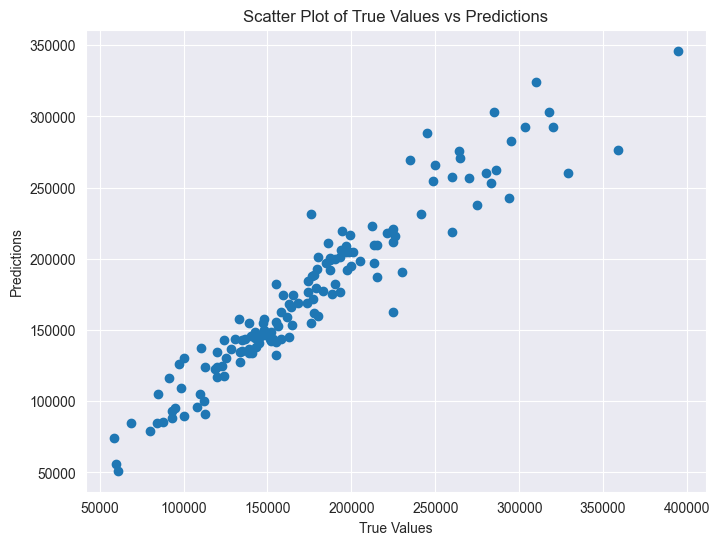

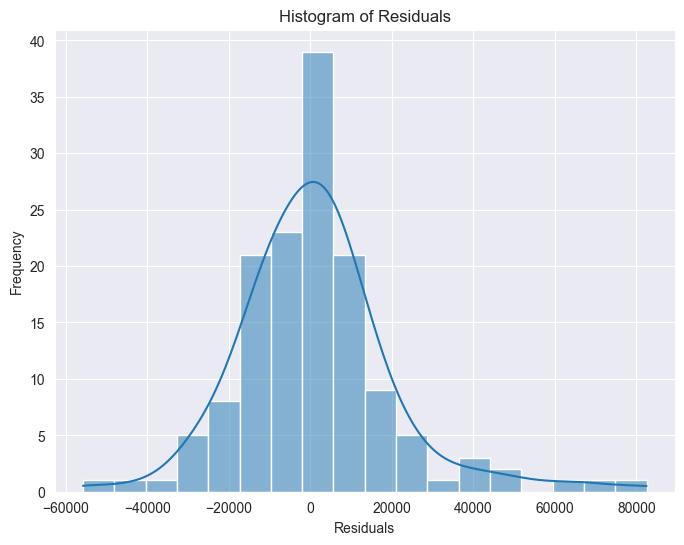

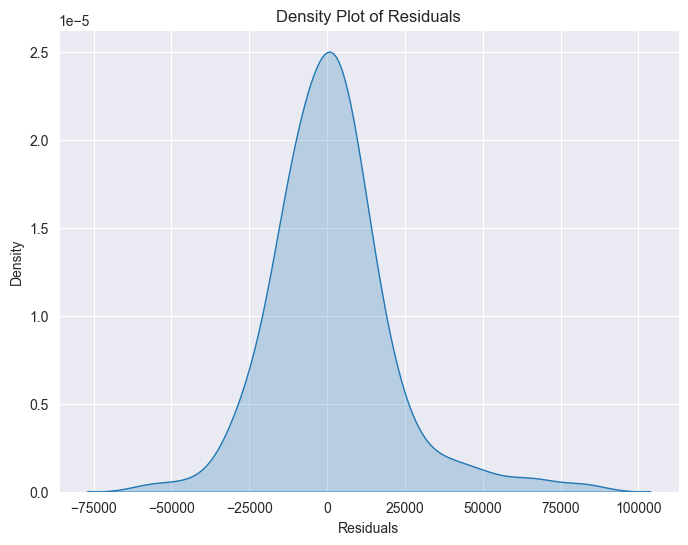

In [22]:
# Scatter plot des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()

# Histogramme des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Courbe de densité des résidus
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()

In [23]:
# Pourcentage d'écart moyen
diff = np.abs(y_test - y_pred)

# Calculer l'écart moyen
ecart_moyen = np.mean(diff)

max_ecart = np.max(diff)
min_ecart = np.min(diff)

# Calculer la moyenne de y_val
moyenne_y_val = np.mean(y_test)

# Convertir l'écart moyen en pourcentage d'écart moyen
ecart_moyen_pct = (ecart_moyen / moyenne_y_val) * 100

print("Pourcentage d'écart moyen:", ecart_moyen_pct, "%")
print("Plus gros écart constaté :", max_ecart, "€")
print("Plus petit écart constaté :", min_ecart, "€")

Pourcentage d'écart moyen: 7.6154898461502984 %
Plus gros écart constaté : 82477.190472388 €
Plus petit écart constaté : 0.05196262101526372 €


In [24]:
#Calcul du pourcentage de sous-estimation moyenne du prix
neg_diff = np.where(y_pred < y_test, np.abs(y_test - y_pred), 0)
neg_ecart_moyen = np.mean(neg_diff)
neg_ecart_med = np.median(neg_diff)

neg_moyenne_y_val = np.mean(np.where(y_pred < y_test, y_test, 0))
neg_ecart_moyen_pct = (neg_ecart_moyen / neg_moyenne_y_val) * 100
print("nombre de valeurs sous-estimées : ", neg_diff.shape[0])
print("% d'erreur de sous-estimation des prix : ", neg_ecart_moyen_pct)
print("sous-estimation moyenne : ", neg_ecart_moyen)
print("mediane : ", neg_ecart_med)

nombre de valeurs sous-estimées :  143
% d'erreur de sous-estimation des prix :  7.734423177760608
sous-estimation moyenne :  7360.704503711274
mediane :  0.0
